In [3]:
import numpy as np
import pandas as pd

np.random.seed(327)

R_values = [10, 100, 1000, 10000, 100000]

results = []

for R in R_values:
    # Generate R pseudo-random numbers
    u_r = np.random.random(R)
    
    # Compute mean, expectation, and standard deviation
    u_mean = np.mean(u_r)
    u_square_mean = np.mean(u_r**2)
    u_std = np.sqrt(u_square_mean - u_mean**2)
    
    results.append([R, u_mean, u_square_mean, u_std])

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=["R", "Mean (u_R)", "Expectation (u²_R)", "Std dev (σ_R)"])

print(df_results)


        R  Mean (u_R)  Expectation (u²_R)  Std dev (σ_R)
0      10    0.481461            0.274784       0.207315
1     100    0.434161            0.265451       0.277408
2    1000    0.505353            0.333298       0.279135
3   10000    0.500314            0.332545       0.286759
4  100000    0.500076            0.333485       0.288805


The numerical results of mean, expectation, and standard deviation approach to their exact values as R increases. This follows the Central Limit Theorem and the Strong Law of Large Numbers.

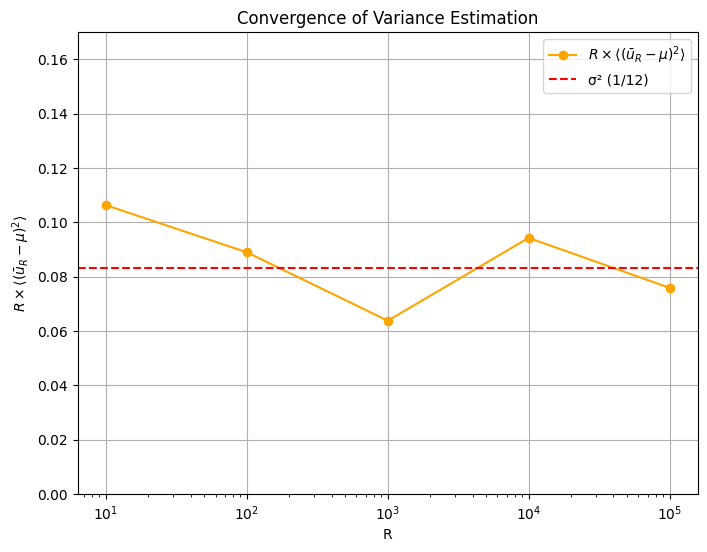

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(327)

R_values = [10, 100, 1000, 10000, 100000]

mu = 0.5

var_results = []

# Compute the average of each R with 100 experiments
for R in R_values:
    squared_diffs = []
    for _ in range(100): 
        u_r = np.random.random(R) 
        u_mean = np.mean(u_r)  
        squared_diffs.append((u_mean - mu) ** 2)  
    
    expected_value = np.mean(squared_diffs)  
    var_results.append([R, expected_value, R * expected_value]) 

var_results = np.array(var_results)

R_values = var_results[:, 0]
expected_variance = var_results[:, 1]
scaled_variance = var_results[:, 2]

# Draw the figure：R × ⟨(ū_R - μ)²⟩ vs. R
plt.figure(figsize=(8, 6))
plt.plot(R_values, scaled_variance, 'o-', label=r'$R \times \langle (\bar{u}_R - \mu)^2 \rangle$', color='orange')
plt.axhline(y=1/12, color='r', linestyle='--', label="σ² (1/12)")
plt.xscale('log') 
plt.xlabel("R")
plt.ylim(0.00, 0.17)
plt.ylabel(r"$R \times \langle (\bar{u}_R - \mu)^2 \rangle$")
plt.title("Convergence of Variance Estimation")
plt.legend()
plt.grid()
plt.show()


 The five points appear approximately constant (1/12). The size of this constant is roughly what I expect (the variance).